### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



['producto', 'categoría_del_producto', 'precio', 'costo_de_envío', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación', 'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
['producto', 'categoría_del_producto', 'precio', 'costo_de_envío', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación', 'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
['producto', 'categoría_del_producto', 'precio', 'costo_de_envío', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación', 'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
['producto', 'categoría_del_producto', 'precio', 'costo_de_envío', 'fecha_de_compra', 'vendedor', 'lugar_de_compra', 'calificación', 'método_de_pago', 'cantidad_de_cuotas', 'lat', 'lon', 'tienda']
Facturación total por tienda:
 tienda
Tienda 1    3.422718e+09
Tienda 2    3.337189e+09
Tienda 3    3.243817e+09
Tienda 4    3.098827e+09
Name: facturacion, dtype: float64


<ipython-input-34-f95d081bf603>:24: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["fecha"] = pd.to_datetime(df["fecha_de_compra"])
<ipython-input-34-f95d081bf603>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_por_tienda.values, y=facturacion_por_tienda.index, palette="viridis")


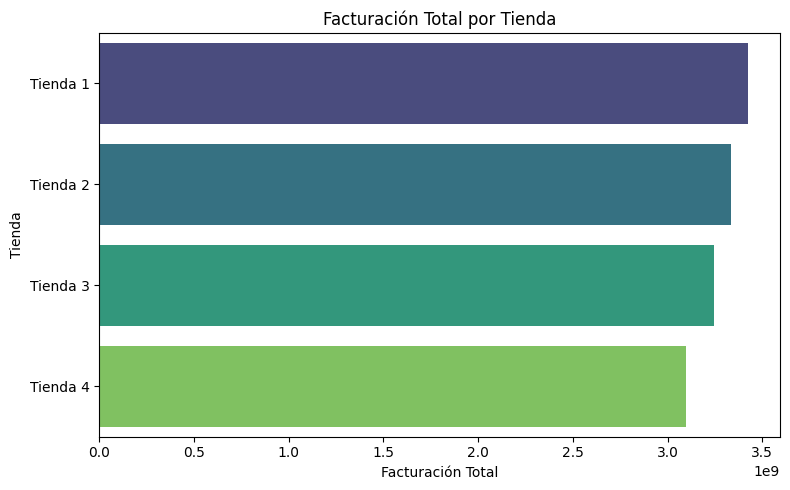

Top 10 productos por facturación:
 producto
TV LED UHD 4K       1.268357e+09
Iphone 15           1.248247e+09
Refrigerador        1.179706e+09
Smart TV            8.380150e+08
Lavadora de ropa    7.509448e+08
Secadora de ropa    6.847062e+08
Lavavajillas        6.738366e+08
Tablet ABXY         6.129845e+08
Celular ABXY        4.538381e+08
Batería             4.234041e+08
Name: facturacion, dtype: float64


<ipython-input-34-f95d081bf603>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_producto.values, y=facturacion_producto.index, palette="flare")


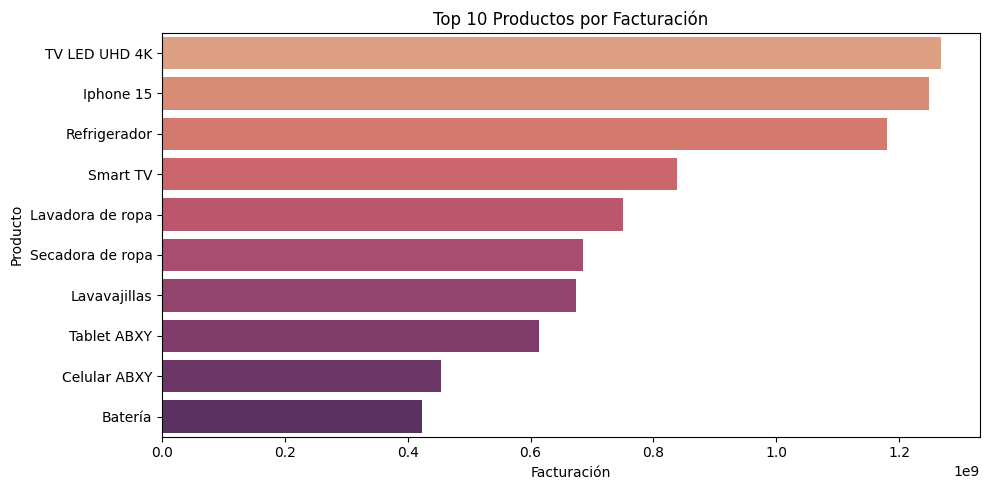

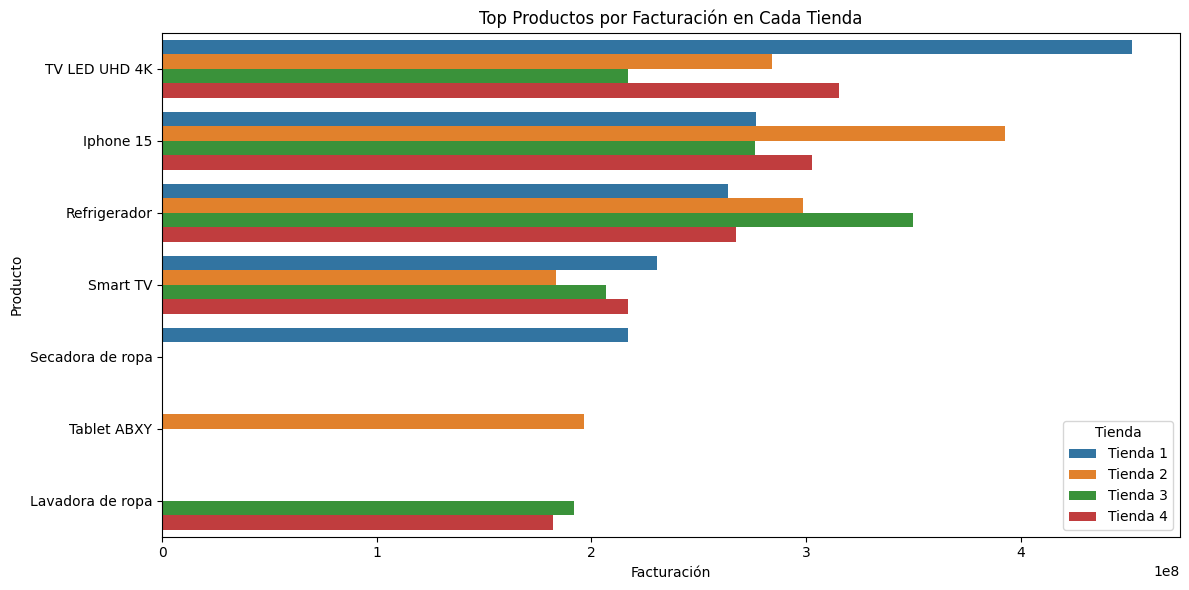

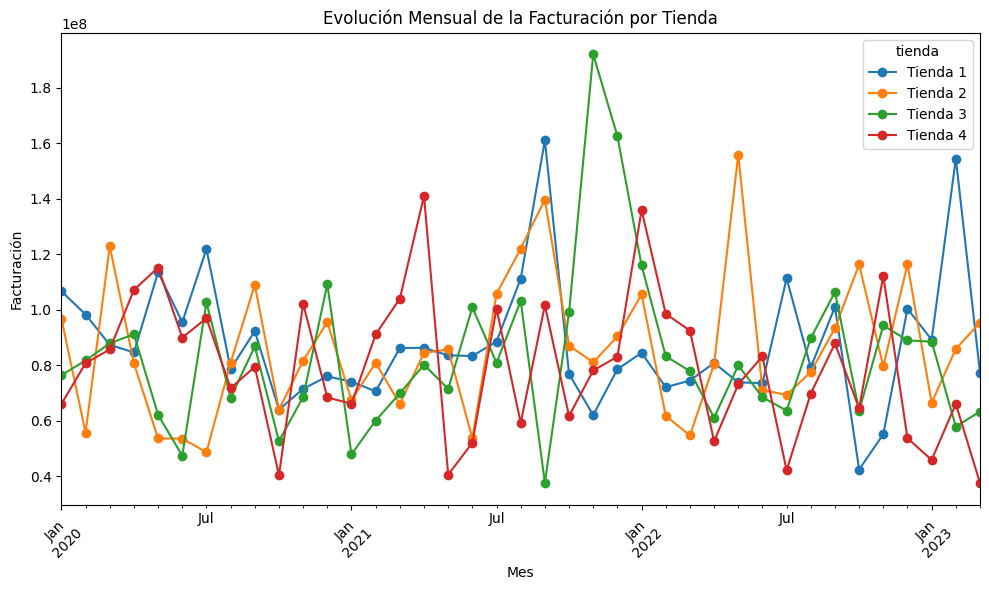

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar columna de tienda
tienda["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

# Unir todos los datos
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Limpieza de columnas
for df in [tienda, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    print(df.columns.tolist())

# Unir todos los datos
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Procesamiento de la fecha
df["fecha"] = pd.to_datetime(df["fecha_de_compra"])

# Crear columna de facturación por venta (precio x cantidad)
df["facturacion"] = df["precio"] * df["cantidad_de_cuotas"]

# Agrupación por tienda
facturacion_por_tienda = df.groupby("tienda")["facturacion"].sum().sort_values(ascending=False)
print("Facturación total por tienda:\n", facturacion_por_tienda)

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=facturacion_por_tienda.values, y=facturacion_por_tienda.index, palette="viridis")
plt.title("Facturación Total por Tienda")
plt.xlabel("Facturación Total")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

# 📦 Análisis por Producto
facturacion_producto = df.groupby("producto")["facturacion"].sum().sort_values(ascending=False).head(10)
print("Top 10 productos por facturación:\n", facturacion_producto)

plt.figure(figsize=(10, 5))
sns.barplot(x=facturacion_producto.values, y=facturacion_producto.index, palette="flare")
plt.title("Top 10 Productos por Facturación")
plt.xlabel("Facturación")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# 🔁 Análisis cruzado: Tienda vs Producto (TOP 5 por tienda)
facturacion_cruzada = df.groupby(["tienda", "producto"])["facturacion"].sum().reset_index()
top_productos_por_tienda = facturacion_cruzada.sort_values("facturacion", ascending=False).groupby("tienda").head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_productos_por_tienda, x="facturacion", y="producto", hue="tienda")
plt.title("Top Productos por Facturación en Cada Tienda")
plt.xlabel("Facturación")
plt.ylabel("Producto")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# Evolución de la facturación en el tiempo
df_mes = df.groupby([df["fecha"].dt.to_period("M"), "tienda"])["facturacion"].sum().unstack()
df_mes.plot(figsize=(10, 6), marker="o")
plt.title("Evolución Mensual de la Facturación por Tienda")
plt.ylabel("Facturación")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df.drop(columns=["fecha_de_compra"], inplace=True)

# 2. Ventas por categoría

Facturación total por categoría:
 categoría_del_producto
Electrónicos               4.889815e+09
Electrodomésticos          4.019072e+09
Muebles                    2.221981e+09
Instrumentos musicales     1.044612e+09
Deportes y diversión       4.320055e+08
Juguetes                   2.116156e+08
Artículos para el hogar    1.703604e+08
Libros                     1.130887e+08
Name: facturacion, dtype: float64


<ipython-input-35-da2fb3f4496e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette="magma")


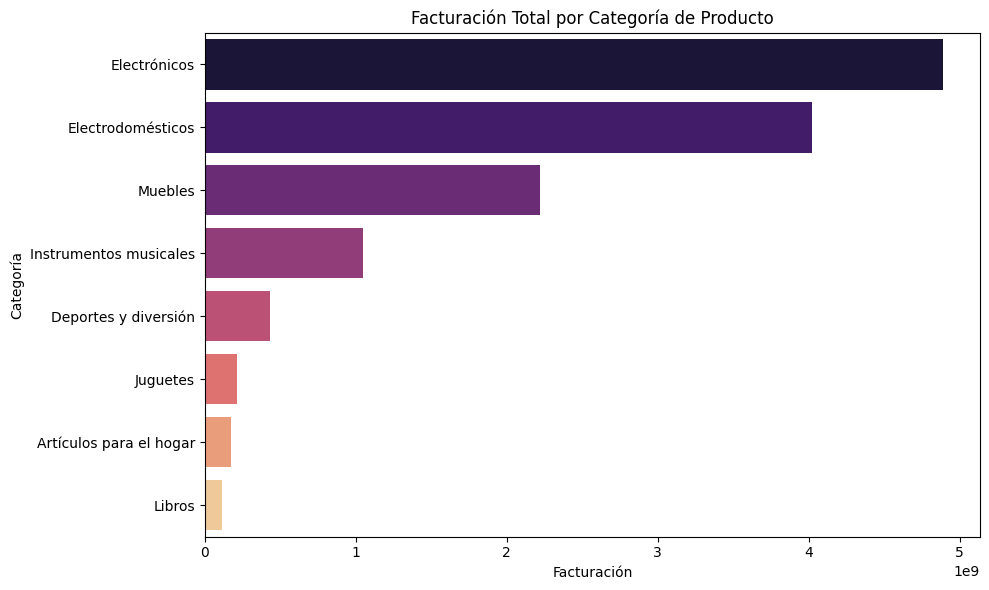

In [35]:
# 🗂️ Análisis por Categoría de Producto
facturacion_categoria = df.groupby("categoría_del_producto")["facturacion"].sum().sort_values(ascending=False)
print("Facturación total por categoría:\n", facturacion_categoria)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=facturacion_categoria.values, y=facturacion_categoria.index, palette="magma")
plt.title("Facturación Total por Categoría de Producto")
plt.xlabel("Facturación")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


Calificación promedio por tienda:
 tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: calificación, dtype: float64


<ipython-input-36-fc68f85ae6b8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calificacion_promedio.values, y=calificacion_promedio.index, palette="viridis")


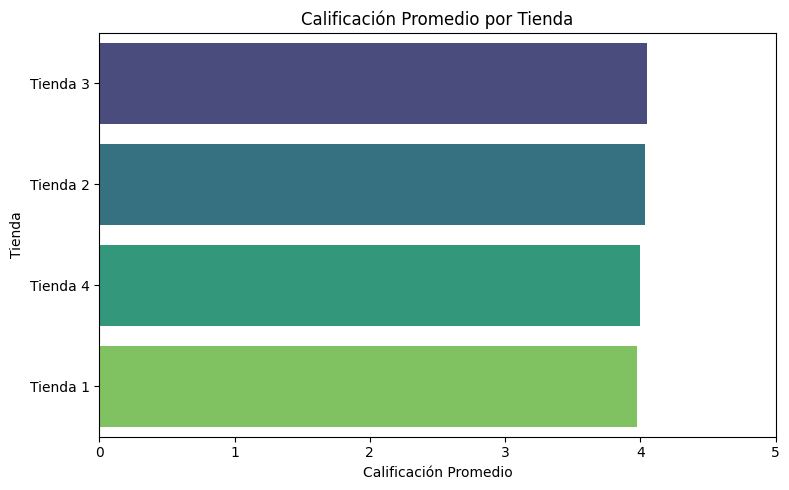

In [36]:
# ⭐ Calificación Promedio por Tienda
calificacion_promedio = df.groupby("tienda")["calificación"].mean().sort_values(ascending=False)
print("Calificación promedio por tienda:\n", calificacion_promedio)

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=calificacion_promedio.values, y=calificacion_promedio.index, palette="viridis")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Calificación Promedio")
plt.ylabel("Tienda")
plt.xlim(0, 5)  # Escala de calificación
plt.tight_layout()
plt.show()

In [37]:
calificacion_total = df["calificación"].mean()
print(f"Calificación promedio total de la tienda (todas las sucursales): {calificacion_total:.2f}")

Calificación promedio total de la tienda (todas las sucursales): 4.01


# 4. Productos más y menos vendidos

Top 10 Productos Más Vendidos por Facturación:
 producto
TV LED UHD 4K       1.268357e+09
Iphone 15           1.248247e+09
Refrigerador        1.179706e+09
Smart TV            8.380150e+08
Lavadora de ropa    7.509448e+08
Secadora de ropa    6.847062e+08
Lavavajillas        6.738366e+08
Tablet ABXY         6.129845e+08
Celular ABXY        4.538381e+08
Batería             4.234041e+08
Name: facturacion, dtype: float64
Top 10 Productos Menos Vendidos por Facturación:
 producto
Balón de voleibol          24754800.0
Vaso térmico               24463500.0
Muñeca bebé                23434700.0
Bloques de construcción    19174000.0
Dashboards con Power BI    19158500.0
Ajedrez de madera          15188200.0
Set de vasos               14566700.0
Cuerda para saltar          8541300.0
Dinosaurio Rex              8200700.0
Cubo mágico 8x8             7259600.0
Name: facturacion, dtype: float64


<ipython-input-38-ba1fada7fc52>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index, palette="Blues_d")


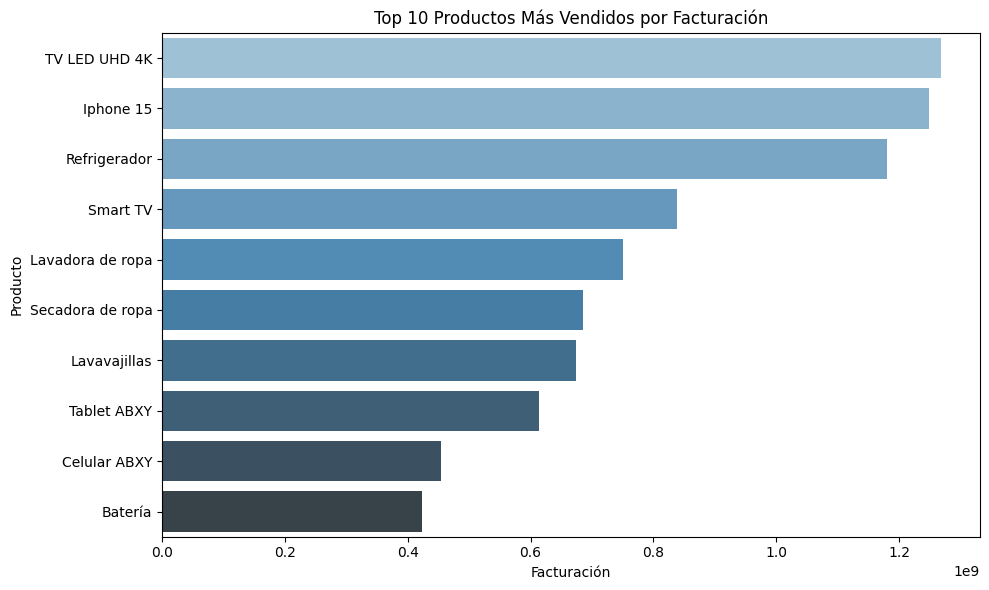

<ipython-input-38-ba1fada7fc52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_menos_vendidos.values, y=productos_menos_vendidos.index, palette="Reds_d")


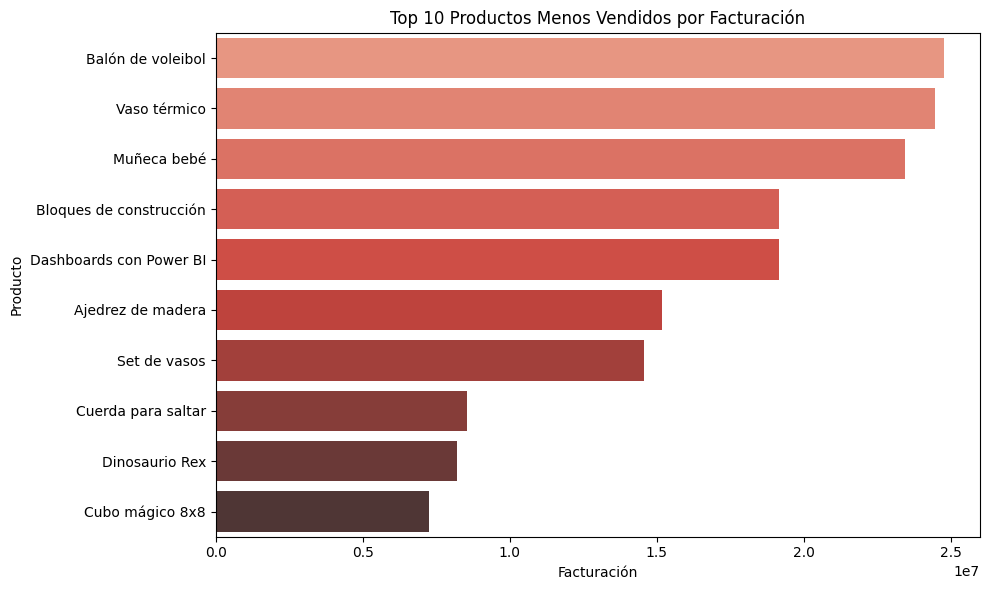

In [38]:
# 📊 Productos Más y Menos Vendidos por Facturación
productos_ventas = df.groupby("producto")["facturacion"].sum().sort_values(ascending=False)

# Los 10 productos más vendidos
productos_mas_vendidos = productos_ventas.head(10)
print("Top 10 Productos Más Vendidos por Facturación:\n", productos_mas_vendidos)

# Los 10 productos menos vendidos (los primeros 10 después de ordenar por valores más bajos)
productos_menos_vendidos = productos_ventas.tail(10)
print("Top 10 Productos Menos Vendidos por Facturación:\n", productos_menos_vendidos)

# Visualización de los 10 más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index, palette="Blues_d")
plt.title("Top 10 Productos Más Vendidos por Facturación")
plt.xlabel("Facturación")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# Visualización de los 10 menos vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_menos_vendidos.values, y=productos_menos_vendidos.index, palette="Reds_d")
plt.title("Top 10 Productos Menos Vendidos por Facturación")
plt.xlabel("Facturación")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

Envío promedio por tienda:
 tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: costo_de_envío, dtype: float64


<ipython-input-39-72864cb44739>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio_tienda.values, y=envio_promedio_tienda.index, palette="crest")


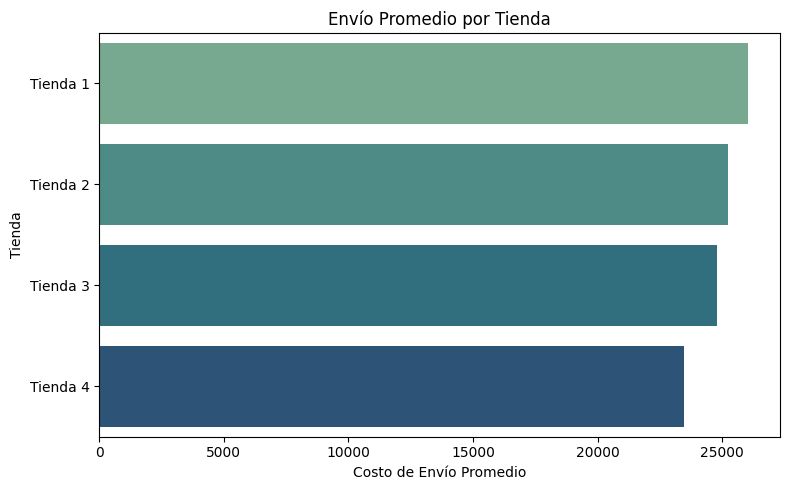

In [39]:
# 💸 Envío Promedio por Tienda
envio_promedio_tienda = df.groupby("tienda")["costo_de_envío"].mean().sort_values(ascending=False)
print("Envío promedio por tienda:\n", envio_promedio_tienda)

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=envio_promedio_tienda.values, y=envio_promedio_tienda.index, palette="crest")
plt.title("Envío Promedio por Tienda")
plt.xlabel("Costo de Envío Promedio")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

🔝 Índice de conveniencia por tienda:
           facturación_total  calificación_promedio  envío_promedio  \
tienda                                                               
Tienda 3       3.243817e+09               4.048326    24805.680373   
Tienda 2       3.337189e+09               4.037304    25216.235693   
Tienda 4       3.098827e+09               3.995759    23459.457167   
Tienda 1       3.422718e+09               3.976685    26018.609580   

          índice_conveniencia  
tienda                         
Tienda 3             1.921608  
Tienda 2             1.895619  
Tienda 4             1.266247  
Tienda 1             1.000000  


<ipython-input-43-f92299e5a993>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


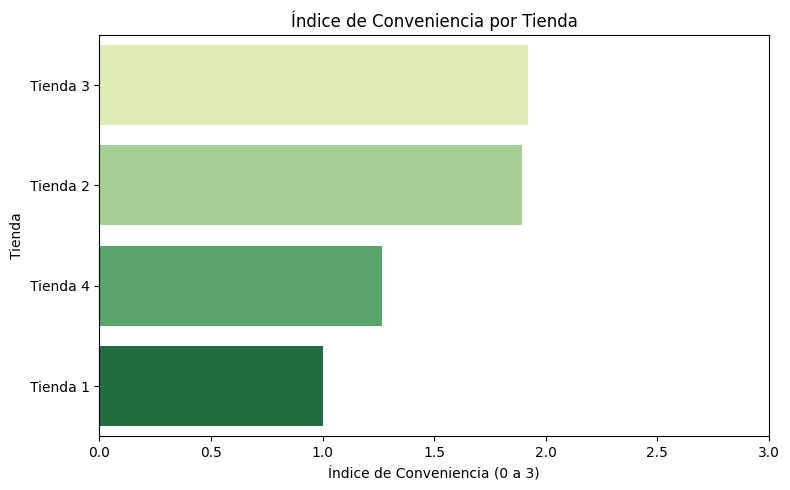

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Recalcular métricas clave por tienda
tienda_metrics = df.groupby("tienda").agg({
    "facturacion": "sum",
    "calificación": "mean",
    "costo_de_envío": "mean"
}).rename(columns={
    "facturacion": "facturación_total",
    "calificación": "calificación_promedio",
    "costo_de_envío": "envío_promedio"
})

# Normalizamos los valores
scaler = MinMaxScaler()

# Normalizar facturación y calificación (más es mejor)
tienda_metrics[["facturacion_norm", "calificacion_norm"]] = scaler.fit_transform(
    tienda_metrics[["facturación_total", "calificación_promedio"]]
)

# Normalizar envío (menos es mejor → invertir)
envio_norm = scaler.fit_transform(tienda_metrics[["envío_promedio"]])
tienda_metrics["envio_norm"] = 1 - envio_norm  # porque menor envío = mejor

# Calcular índice de conveniencia
tienda_metrics["índice_conveniencia"] = (
    tienda_metrics["facturacion_norm"] +
    tienda_metrics["calificacion_norm"] +
    tienda_metrics["envio_norm"]
)

# Ordenar
tienda_metrics_sorted = tienda_metrics.sort_values("índice_conveniencia", ascending=False)

print("🔝 Índice de conveniencia por tienda:\n", tienda_metrics_sorted[["facturación_total", "calificación_promedio", "envío_promedio", "índice_conveniencia"]])

# Visualización del índice de conveniencia
plt.figure(figsize=(8, 5))
sns.barplot(
    x=tienda_metrics_sorted["índice_conveniencia"],
    y=tienda_metrics_sorted.index,
    palette="YlGn"
)
plt.title("Índice de Conveniencia por Tienda")
plt.xlabel("Índice de Conveniencia (0 a 3)")
plt.ylabel("Tienda")
plt.xlim(0, 3)
plt.tight_layout()
plt.show()